<a href="https://colab.research.google.com/github/Fiked-C/NYBG-x-BTTAI-Kaggle-Competition-Entry-Efficientnet-/blob/main/Favour_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install Kaggle
!pip install -q Kaggle

In [2]:
#Upload personal Kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"favourikedife","key":"6a7204565a11694144298229d8091d87"}'}

In [3]:
#Create a kaggle folder/directory
! mkdir ~/.kaggle

In [4]:
#Copy the kaggle.json file into the folder we created
! cp kaggle.json ~/.kaggle/

In [5]:
#Grant permissions for json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c bttai-nybg-2024

 78% 21.5G/27.7G [16:01<04:36, 23.9MB/s]

In [ ]:
! unzip /content/bttai-nybg-2024.zip

Archive:  /content/bttai-nybg-2024.zip
replace BTTAIxNYBG-sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#IMPORTS
import os
import cv2
import zipfile
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Part 1: Load the Data Set
About the columns:

* uniqueID - unique sample identification number (integer)
* classLabel - class name
* classID - class identification number (integer 0-9)
* source - institutional source of image
* imageFile - image file name

In [ ]:
train_df = pd.read_csv('/content/BTTAIxNYBG-train.csv')
validate_df = pd.read_csv('/content/BTTAIxNYBG-validation.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/BTTAIxNYBG-train.csv'

In [ ]:
# Read the image
img = cv2.imread('/content/BTTAIxNYBG-train/BTTAIxNYBG-train/033717271fd80646.jpg')
# Display the image using Google Colab's cv2_imshow
cv2_imshow(img)

AttributeError: 'NoneType' object has no attribute 'clip'

# Part 2: Data Understanding & Data Preparation


In this section I will do the following:

1. Perform exploratory data analysis (EDA) to understand our data, identify key variables, and assess data quality.
2. Update dataset so there are only 2 classes
3. Clean and preprocess your data, handle missing values and outliers, and transform our data into a suitable format for modeling.

In [ ]:
#Display the shape and no. of features of the training dataset
print(train_df.shape)
train_df.head(10)

(81946, 5)


,uniqueID,classLabel,classID,source,imageFile
0,2,occluded-specimens,8,L,a1a8b48e8cb142b3.jpg
1,3,microscope-slides,6,L,79599db2ac9092b6.jpg
2,4,illustrations-color,2,BHL,c449696f2f0d0d92.jpg
3,5,illustrations-color,2,P,80a8f4a393b4e08c.jpg
4,6,animal-specimens,0,AK,041a1c6e73313638.jpg
5,8,occluded-specimens,8,L,ccf1b1ccacb8f8b3.jpg
6,11,live-plants,4,US,246c8e9612111a24.jpg
7,12,biocultural-specimens,1,C,b0b337313164a0f0.jpg
8,13,microscope-slides,6,L,b3931bc4cc2b2925.jpg
9,15,illustrations-gray,3,BR,ebf7674e4c2c0e6e.jpg


In [ ]:
#Display the shape and no. of features of the validation dataset
print(validate_df.shape)
validate_df.head(10)

(10244, 5)


,uniqueID,classLabel,classID,source,imageFile
0,7,microscope-slides,6,K,f09a8abe9e9e9ef2.jpg
1,20,illustrations-color,2,BHL,a6c6868387c6af8c.jpg
2,37,ordinary-pressed-specimens,9,YU,6062c68e8c34b292.jpg
3,59,animal-specimens,0,CAS,363617271597dfd9.jpg
4,60,biocultural-specimens,1,Met,4218d8d2f42b05e4.jpg
5,75,illustrations-gray,3,BHL,a08d868b0f0d8484.jpg
6,77,ordinary-pressed-specimens,9,US,6a66c64e1ccdb3f1.jpg
7,88,occluded-specimens,8,MICH,f8e6b0b2b2bafaf2.jpg
8,90,micrographs-transmission-light,5,Tw,c69656e6c6d4c68e.jpg
9,91,live-plants,4,P,e66268a9d0db4e4c.jpg


In [ ]:
#Understanding the dimensions of the training and validation dataset
print(train_df.describe())
print()
print(validate_df.describe())

            uniqueID       classID
count   81946.000000  81946.000000
mean    61352.780612      4.499597
std     35478.300906      2.872108
min         2.000000      0.000000
25%     30617.250000      2.000000
50%     61169.500000      4.000000
75%     92146.500000      7.000000
max    122879.000000      9.000000

            uniqueID       classID
count   10244.000000  10244.000000
mean    61804.204217      4.503905
std     35559.126690      2.874831
min         7.000000      0.000000
25%     30926.000000      2.000000
50%     62253.500000      5.000000
75%     92531.500000      7.000000
max    122865.000000      9.000000


In [ ]:
print("Training dataset:")
print(sorted(train_df['classLabel'].unique()))
print(sorted(train_df['classID'].unique()))
print(sorted(train_df['source'].unique()))

print("\nValidation dataset:")
print(sorted(validate_df['classLabel'].unique()))
print(sorted(validate_df['classID'].unique()))
print(sorted(validate_df['source'].unique()))

Training dataset:
['animal-specimens', 'biocultural-specimens', 'illustrations-color', 'illustrations-gray', 'live-plants', 'micrographs-transmission-light', 'microscope-slides', 'mixed-pressed-specimens', 'occluded-specimens', 'ordinary-pressed-specimens']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['AK', 'ASU', 'BHL', 'BR', 'C', 'CAS', 'CHNDM', 'E', 'F', 'FMNH', 'GH', 'K', 'KY', 'L', 'MA', 'MCZ', 'MICH', 'MO', 'MPU', 'MZH', 'Met', 'NHMD', 'NMR', 'NY', 'O', 'P', 'RSA', 'SDNHM', 'TTU', 'TU', 'Tw', 'UA', 'UHIM', 'UMMZ', 'US', 'YPM', 'YU']

Validation dataset:
['animal-specimens', 'biocultural-specimens', 'illustrations-color', 'illustrations-gray', 'live-plants', 'micrographs-transmission-light', 'microscope-slides', 'mixed-pressed-specimens', 'occluded-specimens', 'ordinary-pressed-specimens']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['AK', 'ASU', 'BHL', 'BR', 'C', 'CAS', 'CHNDM', 'E', 'F', 'FMNH', 'GH', 'K', 'KY', 'L', 'MA', 'MCZ', 'MICH', 'MO', 'MPU', 'MZH', 'Met', 'NHMD', 'NMR', 'NY', 'O', 'P', 'RSA', 'S

Text(0.5, 1.0, 'Distribution of Classes in Validation Dataset')

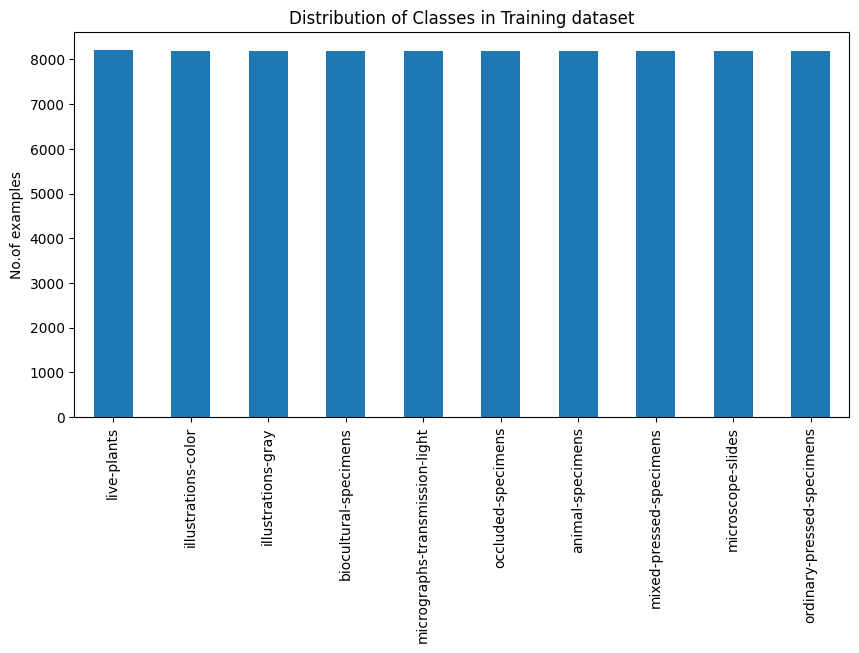

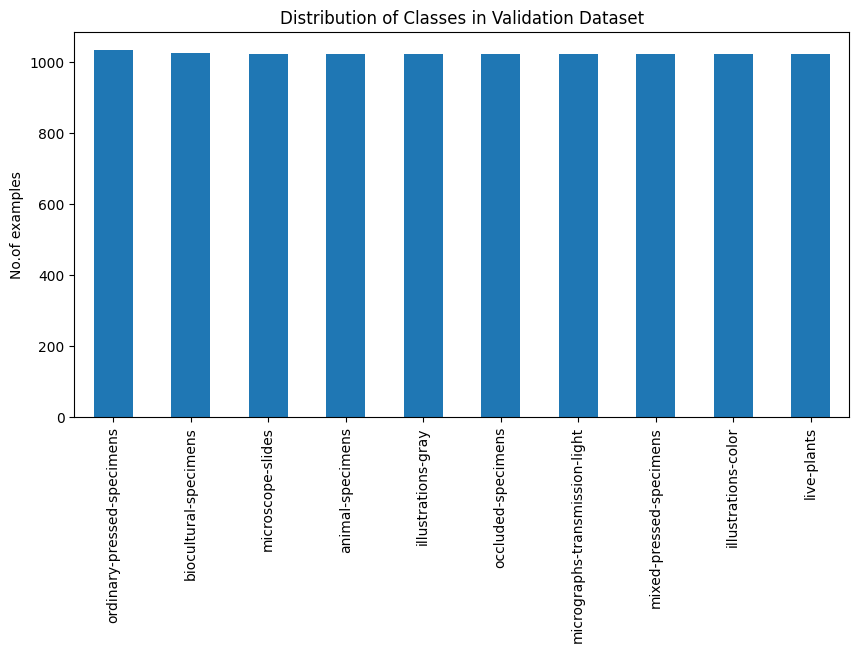

In [ ]:
# Class Distribution Graphs

# Training dataset
plt.figure(figsize=(10,5))
train_df['classLabel'].value_counts().plot(kind='bar')
plt.ylabel('No.of examples')
plt.title('Distribution of Classes in Training dataset')

# Validation dataset
plt.figure(figsize=(10,5))
validate_df['classLabel'].value_counts().plot(kind='bar')
plt.ylabel('No.of examples')
plt.title('Distribution of Classes in Validation Dataset')

Text(0.5, 1.0, 'Distribution of Sources in Validation dataset')

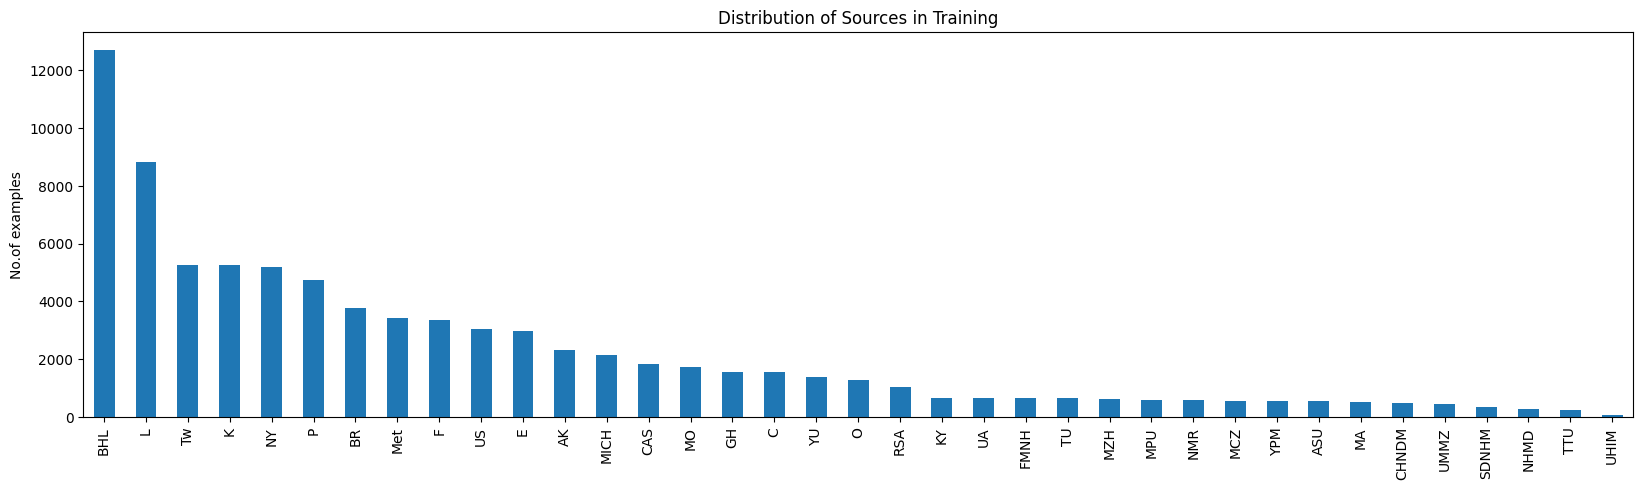

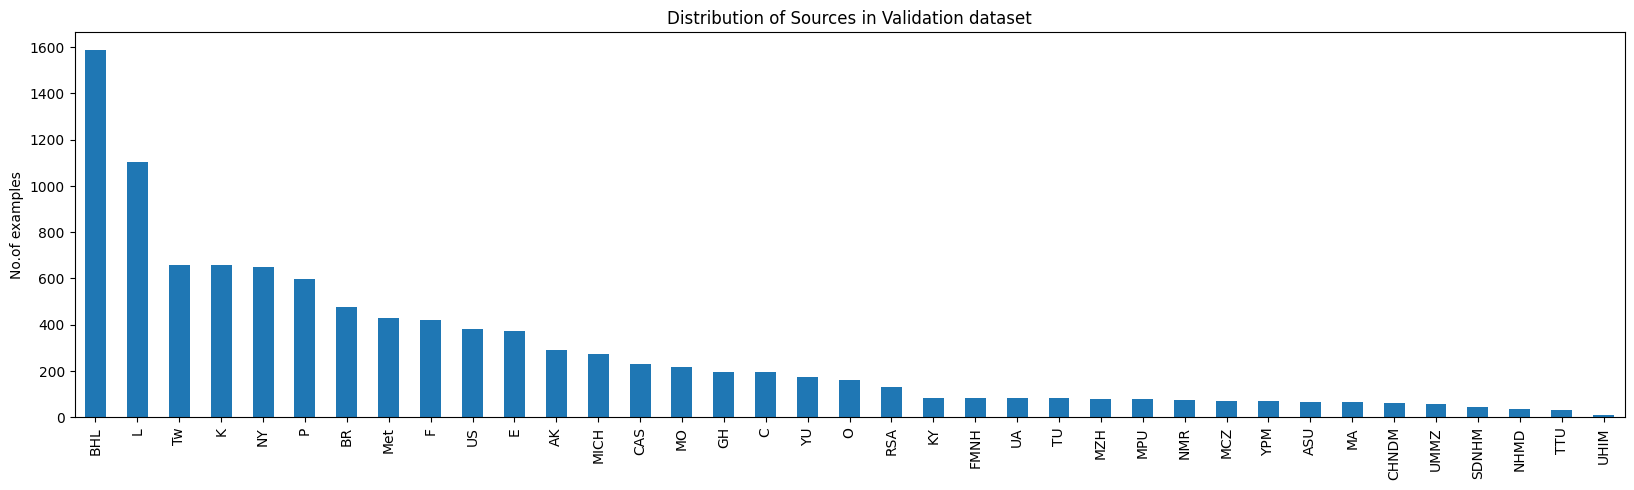

In [ ]:
# Distribution of Sources Graphs

# Training dataset
plt.figure(figsize=(20,5))
train_df['source'].value_counts().plot(kind='bar')
plt.ylabel('No.of examples')
plt.title('Distribution of Sources in Training')

# Validation dataset
plt.figure(figsize=(20,5))
validate_df['source'].value_counts().plot(kind='bar')
plt.ylabel('No.of examples')
plt.title('Distribution of Sources in Validation dataset')

In [ ]:
# The overview page on the Kaggle website only lists ordinary-pressed-specimens standard so rest are non-standard.
non_standard = ['animal-specimens', 'biocultural-specimens', 'illustrations-color',
                'illustrations-gray', 'live-plants', 'micrographs-transmission-light',
                'microscope-slides', 'occluded-specimens','mixed-pressed-specimens']
standard = ['ordinary-pressed-specimens']

# Update classe labels in train_df
condition1 =  (train_df['classLabel'].isin(non_standard))
condition2 = (train_df['classLabel'].isin(standard))
train_df['classLabel'] = np.where(condition1, 'Non-Standard', train_df['classLabel'])
train_df['classLabel'] = np.where(condition2, 'Standard', train_df['classLabel'])
train_df.head(20)

# Update class labels in validate_df
condition1 =  (validate_df['classLabel'].isin(non_standard))
condition2 = (validate_df['classLabel'] == 'ordinary-pressed-specimens')
validate_df['classLabel'] = np.where(condition1, 'Non-Standard', validate_df['classLabel'])
validate_df['classLabel'] = np.where(condition2, 'Standard', validate_df['classLabel'])
validate_df.head(20)

# TODO:
# Should we remove uniqueID, classID, and source?
# Uncomment code below if we need to
# train_df = train_df.drop(columns=['uniqueID', 'classID', 'source'])
# validate_df = validate_df.drop(columns=['uniqueID', 'classID', 'source'])

,uniqueID,classLabel,classID,source,imageFile
0,7,Non-Standard,6,K,f09a8abe9e9e9ef2.jpg
1,20,Non-Standard,2,BHL,a6c6868387c6af8c.jpg
2,37,Standard,9,YU,6062c68e8c34b292.jpg
3,59,Non-Standard,0,CAS,363617271597dfd9.jpg
4,60,Non-Standard,1,Met,4218d8d2f42b05e4.jpg
5,75,Non-Standard,3,BHL,a08d868b0f0d8484.jpg
6,77,Standard,9,US,6a66c64e1ccdb3f1.jpg
7,88,Non-Standard,8,MICH,f8e6b0b2b2bafaf2.jpg
8,90,Non-Standard,5,Tw,c69656e6c6d4c68e.jpg
9,91,Non-Standard,4,P,e66268a9d0db4e4c.jpg


Text(0.5, 1.0, 'Distribution of Classes in Validation Dataset')

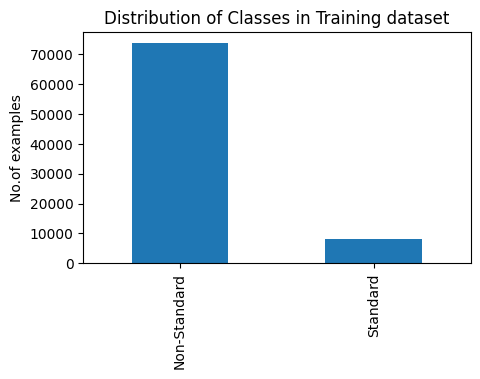

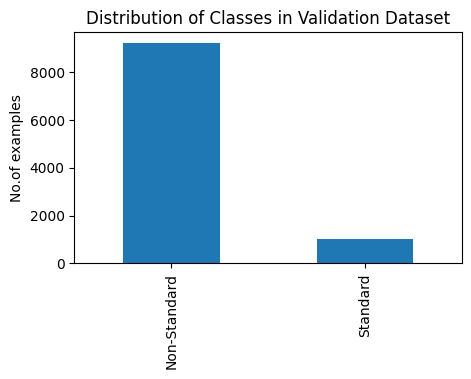

In [ ]:
# Class Distribution Graphs After Updating class labels

# Training dataset
plt.figure(figsize=(5,3))
train_df['classLabel'].value_counts().plot(kind='bar')
plt.ylabel('No.of examples')
plt.title('Distribution of Classes in Training dataset')

# Validation dataset
plt.figure(figsize=(5,3))
validate_df['classLabel'].value_counts().plot(kind='bar')
plt.ylabel('No.of examples')
plt.title('Distribution of Classes in Validation Dataset')

# Part 3: Model and Training

I will be training a convolutional neural network (EfficientNet B7)

In [ ]:
!pip install efficientnet_pytorch torchtoolbox
